# Running epidemics with `complex_contagion`

In [1]:
using Pkg

#activate the correct environment
Pkg.activate("../")

  Activating project at `~/code_proj/sirepids/GraphEpidemics`


In [2]:
using Plots

using GraphEpidemics
import GraphEpidemics as GE

using Graphs
using Random
using Distributions

In [3]:
using DataFrames

In [4]:
rng = Xoshiro(20)

Xoshiro(0xcf030d1a70127e44, 0x45a0f1027fada490, 0x0452fe264e285db3, 0x00f76bd716b1ed40, 0xbc48c9c314c2bd33)

In [5]:
d=20
N=2000
g = erdos_renyi(N,d/N, rng=rng)

{2000, 20322} undirected simple Int64 graph

In [6]:
gamma = 0.08

beta = round(beta_R0(3,g,gamma), digits=5)
println(beta)

0.01181


In [7]:
model = SIRModel(beta,gamma)

SIRModel{Float64, Float64}(0.01181, 0.08)

In [8]:
rng = Xoshiro(2)

start=rand(rng,vertices(g),2)

data = init_model_discrete(model, g, start,:S, :I,rng)

count = run_complex_contagion(model,g,140,rng, data);

In [9]:
count_df = DataFrame(count);

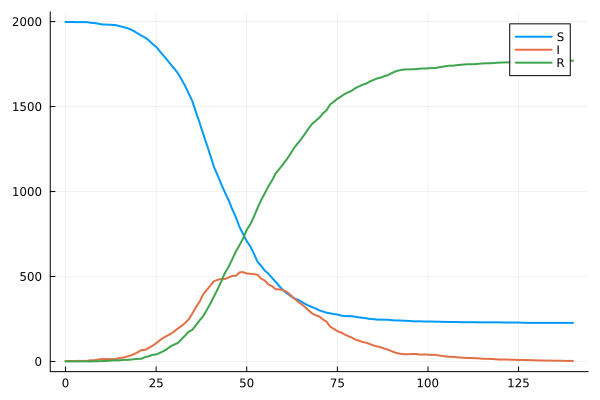

In [10]:
p=plot()
for s in [:S,:I,:R]
    
    plot!(
        count_df.t,
        count_df[:,s],
        label=string(s),
        lw=2
    )
end
p

### SEIR Model

In [11]:
struct SEIRModel{F<:AbstractFloat} <: AbstractEpiModel
    eta::F
    beta::F ##vector is the 
    gamma::F
    #stateType::DataType
end

In [12]:
import GraphEpidemics: model_states, spreading_states, trans_independent, draw_delays, first_active_states, draw_delays_markov

In [13]:
using Distributions

In [14]:
model_states(x::SEIRModel) = (:S,:E,:I,:R)
spreading_states(x::SEIRModel) = Dict(:I=>[(:S,:E, x.beta)])
trans_independent(x::SEIRModel) = [(:E,:I,x.eta),(:I,:R, x.gamma)]

first_active_states(m::SEIRModel) = (:E,)
draw_delays(m::SEIRModel, p, rng::AbstractRNG, node) = draw_delays_markov(p, rng, node )


draw_delays (generic function with 6 methods)

In [15]:
model=SEIRModel(1/5, 0.06, 0.1)

SEIRModel{Float64}(0.2, 0.06, 0.1)

In [16]:
g=barabasi_albert(2000,6)

{2000, 11964} undirected simple Int64 graph

In [17]:
data = init_model_discrete(model, g,rng,:S)
start=rand(rng,vertices(g),2)
println(start)
set_state_nodes(model,data,rng,start,:E,true)
count_df = DataFrame(run_complex_contagion(model,g,130,rng, data));

[1325, 468]


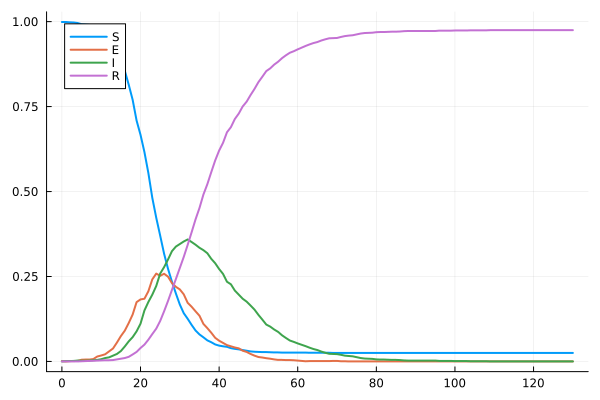

In [18]:
p=plot()
for s in [:S,:E,:I,:R]
    
    plot!(
        count_df.t,
        count_df[:,s]/nv(g),
        label=string(s),
        lw=2
    )
end
p